# Section 39: Foundations of Natural Language Processing

- 05/19/20
- online-ds-pt-100719

## Learning Objectives

- Introduce the field of Natural Language Processing
- Learn about the extensive preprocessing involved with text data
- Walk through text classification - Finding Trump 


## Questions

### Questions from Gdoc

- In this [lab](https://github.com/learn-co-students/dsc-word-vectorization-lab-online-ds-pt-100719/tree/solution), when we talk about the “dimensions of each word”… ‘not quite sure I understand what that means. 
    - Example from the lab :
    `num_dims_wrong = len(tf_idf_all_docs)` 
        - this is just the count of documents?
	- V.S. slicing out the row? 
     `num_dims = len(tf_idf_all_docs[1])` 
         - this slices the length of the whole list??
         
         
         
- Zip up the idea of Sparse Vectors / Non-Zero vectors.  
    - In the last lab: 
    >“The average vectorized article contains 107 non-zero columns. This means that 99.7% of each vector is actually zeroes! This is one reason why it's best not to create your own vectorizers, and rely on professional packages such as scikit-learn and NLTK instead -- they contain many speed and memory optimizations specifically for dealing with sparse vectors. This way, we aren't wasting a giant chunk of memory on a vectorized dataset that only has valid information in 0.3% of it.”
    - However we use this data for modeling regardless?

### Additional Questions?


# Natural Language Processing

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

## Where is NLP Used?
- Reviews (i.e. Amazon)
- Stock market trading
- AI Assistants
- Spam Detection

- **Demonstration:**
    - [Google Duplex AI Assistant](https://youtu.be/D5VN56jQMWM)

# Working with Text Data

## Preprocessing

**Preparing text data requires more processing than normal data.**
1. We must remove things like:
    - punctuation
    - numbers
    - upper vs lowercase letters
    
    
2. It is always recommended that go a step beyond this and remove **commonly used words that contain little information (called "stopwords")** for our machine learning algorithms. Words like: the,was,he,she, it,etc.


3. Additionally, most analyses **need the text tokenized** into a list of words and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by "`,`", which tells the algorithm what should be considered one word.


4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  
    - Stemming<br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%>
    - Lemmatization
    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **vectorization**.

## Vectorization

- For computers to process text it needs to be converted to a numerical representation of the text.

- There are several different ways we can vectorize our text:

    - Count vectorization
    - Term Frequency-Inverse Document Frequency (TF-IDF)
        -  Used for multiple texts
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ 

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!

- There are additional ways to vectorize using Deep Neural Networks to create Word Embeddings (see Module 4 > Appendix: Deep NLP)

# Practicing Text Preprocessing with Trump's Tweets

## Feature Engineering for Text Data


* Do we remove stop words or not?    
* Do we stem or lemmatize our text data, or leave the words as is?   
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?  
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?  
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?   
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?  


In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
finding_trump = 'https://raw.githubusercontent.com/jirvingphd/online-ds-pt-1007109-text-classification-finding-trump/master/finding-trump.csv'
df = pd.read_csv(finding_trump)#'https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv')
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter Media Studio,https://t.co/EVAEYD1AgV,01-01-2020 03:12:07,25016,108830,False,1212209862094012416
1,Twitter for iPhone,HAPPY NEW YEAR!,01-01-2020 01:30:35,85409,576045,False,1212184310389850119
2,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896
3,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
4,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232


In [4]:
df['text'].to_list()

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC',
 'RT @ThisWeekABC: Sen. Ron Johnson says charges against Pres. Trump are "pretty thin gruel" and Speaker Nancy Pelosi\'s decision to withhold…',
 "RT @SenJohnKennedy: The Senate needs to reauthorize the Violence Against Women Act and I am proud to cosponsor @SenJoniErnst's bill that g…",
 'RT @LindseyGrahamSC: To our Iraqi allies:This is your moment to convince the American people the US-Iraq relationship is meaningful to yo…',
 'RT @LindseyGrahamSC: President Trump unlike President Obama will hold you accountable for threats against Americans and hit you where it…',
 'RT @LindseyGrahamSC: Very proud of President @r

In [5]:
## Create a variable "corpus" containing all text
corpus = df['text'].to_list()
corpus[:10]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC',
 'RT @ThisWeekABC: Sen. Ron Johnson says charges against Pres. Trump are "pretty thin gruel" and Speaker Nancy Pelosi\'s decision to withhold…',
 "RT @SenJohnKennedy: The Senate needs to reauthorize the Violence Against Women Act and I am proud to cosponsor @SenJoniErnst's bill that g…",
 'RT @LindseyGrahamSC: To our Iraqi allies:This is your moment to convince the American people the US-Iraq relationship is meaningful to yo…',
 'RT @LindseyGrahamSC: President Trump unlike President Obama will hold you accountable for threats against Americans and hit you where it…']

### Make a Bag-of-Words Frequency Distribution 

- "bag-of-words": collection of all words from a corpus and their frequencies


In [7]:
from nltk import FreqDist

In [9]:
','.join(corpus)[:100]

'https://t.co/EVAEYD1AgV,HAPPY NEW YEAR!,Our fantastic First Lady! https://t.co/6iswto4WDI,RT @DanSca'

In [10]:
## Make a FreqDist from the corpus
freq = FreqDist(','.join(corpus))
## Display 100 most common words
freq.most_common(100)

[(' ', 355279),
 ('e', 193636),
 ('t', 151004),
 ('a', 133814),
 ('o', 132306),
 ('n', 115782),
 ('i', 111789),
 ('r', 107277),
 ('s', 97228),
 ('h', 76548),
 ('l', 67415),
 ('d', 57543),
 ('u', 46550),
 ('c', 45746),
 ('m', 43554),
 ('p', 37247),
 ('g', 35477),
 ('y', 33375),
 ('.', 32244),
 ('w', 30005),
 ('f', 29211),
 ('b', 22246),
 ('T', 19911),
 ('v', 17186),
 (',', 14545),
 ('k', 13783),
 ('/', 13588),
 ('S', 12999),
 ('A', 12922),
 ('R', 12294),
 ('C', 10866),
 ('I', 10743),
 (':', 9821),
 ('N', 9009),
 ('!', 8861),
 ('D', 8787),
 ('@', 8646),
 ('M', 8063),
 ('E', 8008),
 ('P', 7726),
 ('W', 7249),
 ('O', 6828),
 ('H', 6614),
 ('B', 6115),
 ('G', 5937),
 ('F', 5701),
 ('L', 4774),
 ('U', 4765),
 ('0', 4659),
 ('x', 4068),
 ('J', 4060),
 ('’', 3445),
 ('1', 3191),
 ('j', 3084),
 ('…', 2956),
 ('2', 2812),
 ('-', 2672),
 ('K', 2622),
 ('V', 2460),
 ('Y', 2194),
 (';', 2105),
 ('z', 2082),
 ('&', 2079),
 ('“', 1993),
 ('”', 1890),
 ('5', 1848),
 ('#', 1785),
 ('3', 1730),
 ('4', 1

> Hmmmm ... that's not quite right...

In [12]:
## Tokenize corpus then generate FreqDist
from nltk import word_tokenize
tokens = word_tokenize(','.join(corpus))
tokens[:10]

['https',
 ':',
 '//t.co/EVAEYD1AgV',
 ',',
 'HAPPY',
 'NEW',
 'YEAR',
 '!',
 ',',
 'Our']

In [13]:
freq = FreqDist(tokens)
freq.most_common(100)

[('the', 15560),
 (',', 14160),
 ('.', 13708),
 (':', 9462),
 ('to', 9308),
 ('!', 8861),
 ('@', 8646),
 ('and', 8497),
 ('of', 7176),
 ('a', 5658),
 ('is', 5096),
 ('in', 4996),
 ('https', 4265),
 ('for', 4081),
 ('RT', 3819),
 ('’', 3445),
 ('on', 3150),
 ('I', 3132),
 ('that', 3031),
 ('are', 2825),
 ('with', 2650),
 ('...', 2620),
 ('be', 2501),
 ('will', 2486),
 ('our', 2418),
 ('The', 2367),
 ('have', 2116),
 (';', 2105),
 ('&', 2079),
 ('amp', 2070),
 ('“', 1993),
 ('it', 1932),
 ('”', 1890),
 ('you', 1834),
 ('was', 1789),
 ('#', 1785),
 ('at', 1621),
 ('has', 1600),
 ('they', 1553),
 ('s', 1517),
 ('great', 1501),
 ('President', 1492),
 ('not', 1415),
 ('we', 1389),
 ('by', 1375),
 ('this', 1336),
 ('all', 1304),
 ('t', 1289),
 ('(', 1181),
 (')', 1174),
 ('Trump', 1154),
 ('Democrats', 1145),
 ('people', 1124),
 ('very', 1084),
 ('-', 1079),
 ('We', 1072),
 ('who', 1040),
 ('?', 1007),
 ('realDonaldTrump', 996),
 ('from', 979),
 ('my', 966),
 ('as', 956),
 ('he', 943),
 ('the

> Better...but what's our next issue?

In [14]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string

In [15]:
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
additional_punc = ['“','”','...','``',"''",'’']

In [27]:
## Add punctuation to stopwords_list
stopwords_list+=string.punctuation
## Add additional_punc to stopwords_list
stopwords_list.extend(additional_punc )
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
## Remove stopwords (create var stopped_tokens) and then re-product the FreqDist
stopped_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_list]
stopped_tokens

['https',
 '//t.co/evaeyd1agv',
 'happy',
 'new',
 'year',
 'fantastic',
 'first',
 'lady',
 'https',
 '//t.co/6iswto4wdi',
 'rt',
 'danscavino',
 'https',
 '//t.co/cjrpyskf1z',
 'rt',
 'senjohnkennedy',
 'think',
 'speaker',
 'pelosi',
 '2nd',
 'thoughts',
 'impeaching',
 'president',
 'senate',
 'get',
 'back',
 'work',
 'usm…',
 'thank',
 'steve',
 'greatest',
 'witch',
 'hunt',
 'u.s.',
 'history',
 'https',
 '//t.co/i3bsnvp6gc',
 'rt',
 'thisweekabc',
 'sen.',
 'ron',
 'johnson',
 'says',
 'charges',
 'pres',
 'trump',
 'pretty',
 'thin',
 'gruel',
 'speaker',
 'nancy',
 'pelosi',
 "'s",
 'decision',
 'withhold…',
 'rt',
 'senjohnkennedy',
 'senate',
 'needs',
 'reauthorize',
 'violence',
 'women',
 'act',
 'proud',
 'cosponsor',
 'senjoniernst',
 "'s",
 'bill',
 'g…',
 'rt',
 'lindseygrahamsc',
 'iraqi',
 'allies',
 'moment',
 'convince',
 'american',
 'people',
 'us-iraq',
 'relationship',
 'meaningful',
 'yo…',
 'rt',
 'lindseygrahamsc',
 'president',
 'trump',
 'unlike',
 'pre

In [30]:
## Let's try that one last time
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('https', 4265),
 ('rt', 3819),
 ('great', 2552),
 ('amp', 2070),
 ('president', 1605),
 ('people', 1309),
 ('trump', 1193),
 ('democrats', 1166),
 ('realdonaldtrump', 1045),
 ('country', 947),
 ('news', 931),
 ('thank', 929),
 ('big', 832),
 ('fake', 802),
 ('new', 791),
 ('many', 749),
 ('today', 747),
 ('get', 741),
 ('would', 714),
 ('border', 711),
 ('america', 699),
 ('never', 676),
 ('time', 666),
 ('u.s.', 625),
 ('american', 611),
 ('much', 594),
 ('want', 591),
 ('one', 588),
 ('years', 587),
 ('media', 582),
 ('good', 567),
 ('united', 543),
 ('even', 525),
 ('house', 523),
 ('states', 509),
 ('back', 492),
 ('done', 485),
 ("'s", 479),
 ('must', 478),
 ('make', 478),
 ('china', 474),
 ('like', 465),
 ('going', 460),
 ('vote', 458),
 ('nothing', 455),
 ('dems', 452),
 ('job', 440),
 ('impeachment', 435),
 ('jobs', 431),
 ('state', 413),
 ('day', 407),
 ('first', 406),
 ('us', 404),
 ('bad', 402),
 ('whitehouse', 398),
 ('made', 391),
 ('military', 386),
 ('deal', 386),
 ('e

> What recognizable pattern of characters is high on the frequency list?

### Comparing Phases of Proprocessing/Tokenization

In [32]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

# Regular Expressions

- Regular expressions can help us capture/remove complicated patterns in our text.
- Best regexp resource and tester: https://regex101.com/

    - Make sure to check "Python" under Flavor menu on left side.
    
    
- **Let's use regular expressions to remove URLs from our text**

In [33]:
## Select an example tweet
text =  corpus[6615]
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [34]:
## Select a second example tweet
text2=corpus[7347]
text2

'RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!'

In [35]:
## Use of re from the lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(text,pattern)

['I',
 'will',
 'be',
 'in',
 'Green',
 'Bay',
 'Wisconsin',
 'on',
 'Saturday',
 'April',
 'th',
 'at',
 'the',
 'Resch',
 'Center',
 'pm',
 'CDT',
 'Big',
 'crowd',
 'expected',
 'MAGA',
 'https',
 't',
 'co',
 'BPYK',
 'PF',
 'O']

### Let's use regex to find/remove URLS

- www.regex101.com
    - Copy and paste example text to search
    - Test out regular expressions and see what they pick up

In [37]:
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [36]:
print(text,tex2)

I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8 RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!


In [40]:
import re
exp = r"(https://\w*\.\w*\.?/?\w+)"
re.findall(exp,text )

['https://t.co/BPYK8PF0O8']

In [41]:
def clean_text(text,regex=True):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize

    ## tokenize text
    if regex:
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        tokens= regexp_tokenize(text,pattern)
    else:
        tokens = word_tokenize(text)
        
    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    return stopped_tokens

In [42]:
## Other uses of RegEx for Tweet preprocessing
import re

def find_urls(string): 
    return re.findall(r"(http[s]?://\w*\.\w*/+\w+)",string)

def find_hashtags(string):
    return re.findall(r'\#\w*',string)

def find_retweets(string):
    return re.findall(r'RT [@]?\w*:',string)

def find_mentions(string):
    return re.findall(r'\@\w*',string)

In [43]:
find_urls(text)

['https://t.co/BPYK8PF0O8']

In [44]:
find_mentions(text2)

['@real_defender', '@realDonaldTrump']

## Stemming/Lemmatization

In [45]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet')) # foot
print(lemmatizer.lemmatize('running')) # run [?!] Does not match expected output

foot
running


In [46]:
text_in =  corpus[6615]

def process_tweet(text,as_lemmas=False,as_tokens=True):
#     text=text.copy()
    for x in find_urls(text):
        text = text.replace(x,'')
        
    for x in find_retweets(text):
        text = text.replace(x,'')    
        
    for x in find_hashtags(text):
        text = text.replace(x,'')    

    if as_lemmas:
        from nltk.stem.wordnet import WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        text = lemmatizer.lemmatize(text)
    
    if as_tokens:
        text = clean_text(text)
    
    if len(text)==0:
        text=''
            
    return text

In [48]:
@interact
def show_processed_text(i=(0,len(corpus)-1)):
    text_in = corpus[i]#.copy()
    print(text_in,'\n')
    text_out = process_tweet(text_in)
    print(text_out,'\n')
    text_out2 = process_tweet(text_in,as_lemmas=True)
    print(text_out2)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

## Other NLP Analyses

- Sentiment Analysis (positive or negative connotation of words)
- Parts-of-Speech Tagging
- Named-Entity-Recognition


- Not to mention Deep NLP and Word Embeddings (see Module 4 > Appendix)

# Text Classification - Finding Trump

## Finding Trump with Sklearn

In [49]:
finding_trump = 'https://raw.githubusercontent.com/jirvingphd/online-ds-pt-1007109-text-classification-finding-trump/master/finding-trump.csv'

In [50]:
df = pd.read_csv(finding_trump,#'https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv',
                index_col='created_at',parse_dates=['created_at'])
df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2020-01-01 03:12:07,Twitter Media Studio,https://t.co/EVAEYD1AgV,25016,108830,False,1212209862094012416
2020-01-01 01:30:35,Twitter for iPhone,HAPPY NEW YEAR!,85409,576045,False,1212184310389850119
2020-01-01 01:22:28,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,27567,132633,False,1212182267113680896
2020-01-01 01:18:47,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,10796,0,True,1212181341078458369
2020-01-01 01:17:43,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,8893,0,True,1212181071988703232


In [51]:
df.index

DatetimeIndex(['2020-01-01 03:12:07', '2020-01-01 01:30:35',
               '2020-01-01 01:22:28', '2020-01-01 01:18:47',
               '2020-01-01 01:17:43', '2020-01-01 01:16:27',
               '2020-01-01 01:08:27', '2020-01-01 01:07:22',
               '2020-01-01 01:06:21', '2020-01-01 01:06:17',
               ...
               '2016-12-03 19:13:01', '2016-12-03 19:09:40',
               '2016-12-03 16:37:27', '2016-12-03 03:06:41',
               '2016-12-03 01:41:30', '2016-12-03 00:44:20',
               '2016-12-02 02:45:18', '2016-12-01 22:52:10',
               '2016-12-01 14:38:09', '2016-12-01 14:37:57'],
              dtype='datetime64[ns]', name='created_at', length=14066, freq=None)

In [54]:
## Get time period where Trump still had his personal Androida
android_ts = df[ df['source']=='Twitter for Android']
start_ts = android_ts.index[0]
end_ts = android_ts.index[-1]

start_ts,end_ts

(Timestamp('2017-03-25 14:41:14'), Timestamp('2016-12-01 14:38:09'))

In [56]:
df = df.loc[start_ts:end_ts]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2017-03-25 14:41:14,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,10116,51247,False,845646761704243200
2017-03-25 14:37:52,Twitter for Android,ObamaCare will explode and we will all get tog...,22518,104321,False,845645916732358656
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
...,...,...,...,...,...,...
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656


In [57]:
## Check target class distribution
df['source'].value_counts()

Twitter for Android    364
Twitter for iPhone     239
Twitter Web Client      14
Name: source, dtype: int64

In [61]:
## Remove unwanted source
df = df[~df['source'].str.contains('Web')]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2017-03-25 14:41:14,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,10116,51247,False,845646761704243200
2017-03-25 14:37:52,Twitter for Android,ObamaCare will explode and we will all get tog...,22518,104321,False,845645916732358656
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
...,...,...,...,...,...,...
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656


In [63]:
## Check final value counts
df['source'].value_counts(normalize=True)

Twitter for Android    0.603648
Twitter for iPhone     0.396352
Name: source, dtype: float64

In [65]:
## Make target column for Trump Tweets (1=Trump/Android)
df['trump_tweet'] = (df['source']=='Twitter for Android').astype(int)
df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str,trump_tweet
created_at,,,,,,,
2017-03-25 14:41:14,Twitter for Android,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,10116,51247,False,845646761704243200,1
2017-03-25 14:37:52,Twitter for Android,ObamaCare will explode and we will all get tog...,22518,104321,False,845645916732358656,1
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056,0
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121,0
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968,0


In [88]:
## Separate X and y
y = df['trump_tweet'].copy()
X = df['text'].copy()
X


created_at
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
2017-03-25 14:37:52    ObamaCare will explode and we will all get tog...
2017-03-25 13:29:17    Happy #MedalOfHonorDay to our heroes! ➡️https:...
2017-03-24 17:59:42    Today I was thrilled to announce a commitment ...
2017-03-24 17:03:46    Today I was pleased to announce the official a...
                                             ...                        
2016-12-03 01:41:30    Interesting how the U.S. sells Taiwan billions...
2016-12-03 00:44:20    The President of Taiwan CALLED ME today to wis...
2016-12-02 02:45:18    Thank you Ohio! Together we made history – and...
2016-12-01 22:52:10    Heading to U.S. Bank Arena in Cincinnati Ohio ...
2016-12-01 14:38:09    Getting ready to leave for the Great State of ...
Name: text, Length: 603, dtype: object

In [69]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [89]:
X_train

created_at
2017-03-23 01:04:32    RT @mitchellvii: Trump always ends up being ri...
2017-02-21 23:23:13    The so-called angry crowds in home districts o...
2017-01-19 13:00:13    Getting ready to leave for Washington D.C. The...
2017-03-17 14:07:26    The President Changed. So Has Small Businesses...
2017-01-16 00:16:20    .@FoxNews "Outgoing CIA Chief John Brennan bla...
                                             ...                        
2016-12-30 19:46:55    Join @AmerIcan32 founded by Hall of Fame legen...
2016-12-17 13:07:22    @EazyMF_E: @realDonaldTrump Many people are no...
2017-01-25 22:05:59    I will be interviewed by @DavidMuir tonight at...
2017-03-04 13:19:29    Arnold Schwarzenegger isn't voluntarily leavin...
2017-02-09 23:35:49    SEE YOU IN COURT THE SECURITY OF OUR NATION IS...
Name: text, Length: 452, dtype: object

In [71]:
y_train.value_counts(normalize=True)

1    0.603982
0    0.396018
Name: trump_tweet, dtype: float64

In [73]:
y_test.value_counts(normalize=True)

1    0.602649
0    0.397351
Name: trump_tweet, dtype: float64

### Tokenization & Vectorization 

In [74]:
import nltk
tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False,)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,stop_words=stopwords_list)
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1c38b77d68>>,
           

In [86]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [95]:
len(X_train)

452

In [90]:
X_train_tfidf.shape

(452, 2231)

In [92]:
len(vectorizer.vocabulary_)

2231

In [96]:
X_train_tfidf

<452x2231 sparse matrix of type '<class 'numpy.float64'>'
	with 5154 stored elements in Compressed Sparse Row format>

### Random Forest Model

In [99]:
## Make, fit model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
## Get predictions
y_hat_train = rf.predict(X_train_tfidf)
y_hat_test =  rf.predict(X_test_tfidf)

In [102]:
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate_model(y_test,y_hat_test,X_test,clf=None,
                  scoring=metrics.recall_score,verbose=False):

    print(metrics.classification_report(y_test,y_hat_test))
    metrics.plot_confusion_matrix(clf,X_test,y_test,normalize='true',
                                 cmap='Blues')
    plt.show()
    if verbose:
        print("MODEL PARAMETERS:")
        print(pd.Series(rf.get_params()))
        

    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00       273

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



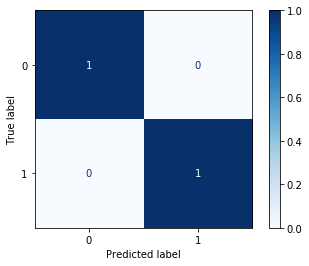

In [104]:
## Evaluate Model - Training Data
evaluate_model(y_train, y_hat_train, X_train_tfidf, rf)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        60
           1       0.82      0.90      0.86        91

    accuracy                           0.82       151
   macro avg       0.82      0.80      0.81       151
weighted avg       0.82      0.82      0.82       151



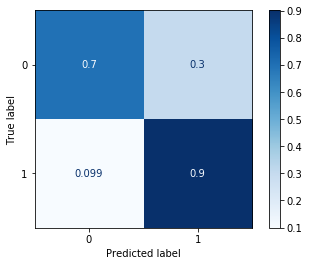

In [106]:
## Evaluate Model - Test Data
evaluate_model(y_test, y_hat_test, X_test_tfidf, rf)

In [108]:
vectorizer.get_feature_names()[:10]

['#1in',
 '#ahca',
 '#americafirst',
 '#draintheswam',
 '#dts',
 '#facebook',
 '#fakenews',
 '#family',
 '#familytime',
 '#godblesstheusa']

### Get feature importances as text

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 127480 missing from current font.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 127482 missing from current font.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning:

Glyph 127480 missing from current font.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning:

Glyph 127482 missing from current font.



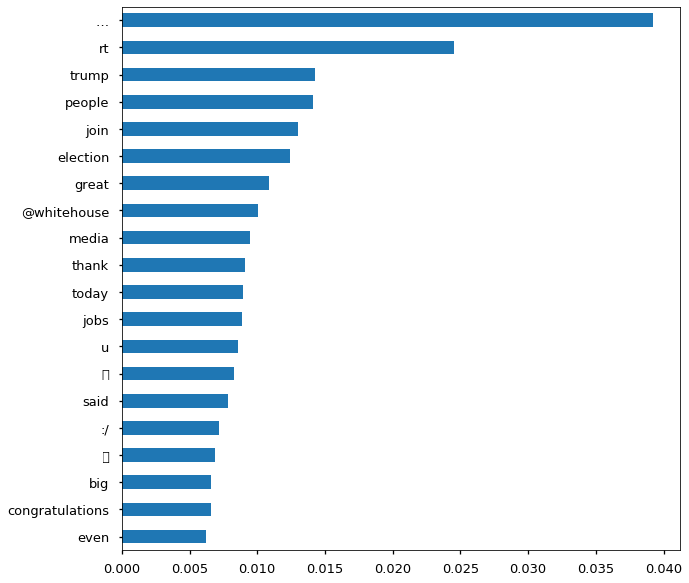

In [112]:
with plt.style.context('seaborn-talk'):

    importance = pd.Series(rf.feature_importances_,vectorizer.get_feature_names())
    importance.sort_values().tail(20).plot(kind='barh',figsize=(10,10))

In [115]:
df[df['text'].str.contains('...',regex= False)]['trump_tweet'].value_counts(normalize=True)

1    0.865672
0    0.134328
Name: trump_tweet, dtype: float64

In [116]:
top_word_probs = {}
for word in importance.sort_values().tail(20).index:
    rows = df['text'].str.contains(word,regex=False,case=False)
    val_count= df[rows]['trump_tweet'].value_counts(normalize=True)
    top_word_probs[word] = val_count

In [146]:
## Turn into dataframe
top_words = pd.DataFrame(top_word_probs).T
top_words.columns= ['Not Trump','Trump']
top_words.style.background_gradient(axis=1)

,Not Trump,Trump
even,0.333333,0.666667
congratulations,0.666667,0.333333
big,0.179487,0.820513
🇸,1,nan
:/,0.976048,0.0239521
said,0.0555556,0.944444
🇺,1,nan
u,0.39783,0.60217
jobs,0.53125,0.46875
today,0.578947,0.421053


## Other Classifiers

###  Naive Bayes

              precision    recall  f1-score   support

           0       0.95      0.65      0.77        60
           1       0.81      0.98      0.89        91

    accuracy                           0.85       151
   macro avg       0.88      0.81      0.83       151
weighted avg       0.87      0.85      0.84       151



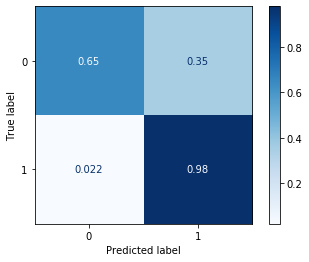

In [124]:
nb_classifier = MultinomialNB()#alpha = 1.0e-08)
nb_classifier.fit(X_train_tfidf,y_train)
y_hat_test = nb_classifier.predict(X_test_tfidf)
evaluate_model(y_test,y_hat_test,X_test_tfidf,nb_classifier)

In [ ]:
# nb_classifier.class_count_

### GridSearch Random Forest

In [125]:
from sklearn.model_selection import GridSearchCV
params  = {'criterion':['gini','entropy'],
           'max_depth':[3,5,10,50,100,None],
          'class_weight':['balanced',None],
           'bootstrap':[True ,False],
          'min_samples_leaf':[1,2,3,4],
          }
rf_clf = RandomForestClassifier()
grid = GridSearchCV(rf_clf,params,return_train_score=False,
                    scoring='recall_weighted',n_jobs=-1)
grid.fit(X_train_tfidf,y_train)
print(grid.best_score_)
grid.best_params_

0.7875946275946275


{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 100,
 'min_samples_leaf': 1}

In [126]:
best_rf = grid.best_estimator_
best_rf.fit(X_train_tfidf, y_train)

y_hat_test = best_rf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        60
           1       0.84      0.90      0.87        91

    accuracy                           0.83       151
   macro avg       0.83      0.82      0.82       151
weighted avg       0.83      0.83      0.83       151



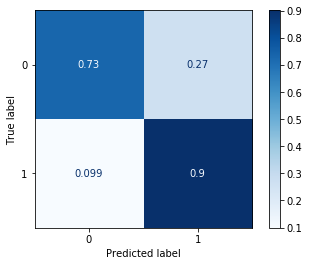

In [127]:
evaluate_model(y_test,y_hat_test,X_test_tfidf,best_rf)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 127482 missing from current font.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning:

Glyph 127482 missing from current font.



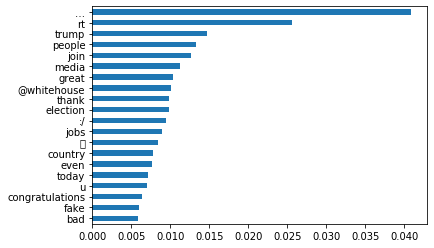

In [140]:
importance = pd.Series(best_rf.feature_importances_,index= vectorizer.get_feature_names())
importance.sort_values(inplace=True)
importance.tail(20).plot(kind='barh')

# APPENDIX

### Summary table from Finding Trump

In [150]:
# top_words

In [151]:
## Summary Table with Most Frequent Words 
prob_cols =['Not Trump','Trump']#'Twitter for Android','Twitter for iPhone']
top_words['importance'] = importance.loc[top_words.index]

top_words['max_prob'] = top_words[prob_cols].max(axis=1)
top_words['Max Prob Class'] = top_words[prob_cols].idxmax(axis=1)
top_words.sort_values('importance',0,0,inplace=True)
top_words.style.bar('importance')\
                    .background_gradient(subset=['max_prob'])\
                    .highlight_max(subset=prob_cols,axis=1,color='lightgreen')
#.background_gradient(subset=prob_cols,axis=1,cmap='Reds')

,Not Trump,Trump,importance,max_prob,Max Prob Class
…,0.984127,0.015873,0.0408917,0.984127,Not Trump
rt,0.472441,0.527559,0.0255833,0.527559,Trump
trump,0.696429,0.303571,0.0147424,0.696429,Not Trump
people,0.12,0.88,0.0133019,0.88,Trump
join,0.964286,0.0357143,0.012699,0.964286,Not Trump
media,0.114286,0.885714,0.0112398,0.885714,Trump
great,0.427083,0.572917,0.0103067,0.572917,Trump
@whitehouse,1,nan,0.01004,1,Not Trump
thank,0.639344,0.360656,0.009824,0.639344,Not Trump
election,0.129032,0.870968,0.00980646,0.870968,Trump


### Additional Ways to Show Frequency

- [Word Clouds](https://www.geeksforgeeks.org/generating-word-cloud-python/)

(-0.5, 399.5, 199.5, -0.5)

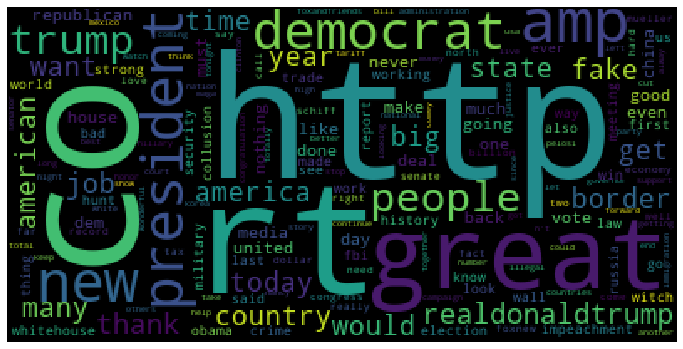

In [129]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stopwords_list,collocations=False)
wordcloud.generate(','.join(stopped_tokens))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

## Other Bag of Words Statistics

### Bigrams

In [137]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)

tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)
top_words = pd.DataFrame.from_records(tweets_scored,columns=['Words','Frequency']).head(20)
top_words

,Words,Frequency
0,"(fake, news)",0.002832
1,"(united, states)",0.001993
2,"(rt, realdonaldtrump)",0.001879
3,"(witch, hunt)",0.001489
4,"(president, trump)",0.001398
5,"(rt, whitehouse)",0.001144
6,"(america, great)",0.001021
7,"(white, house)",0.000999
8,"(news, media)",0.000930
9,"(president, realdonaldtrump)",0.000894


### Mutual Information Scores

In [131]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()

tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)

tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)
pd.DataFrame.from_records(tweet_pmi_scored,columns=['Words','PMI']).head(20)

,Words,PMI
0,"(da, nang)",15.427352
1,"(idlib, province)",15.427352
2,"(madame, peng)",15.427352
3,"(peng, liyuan)",15.427352
4,"(catherine, herridge)",15.164318
5,"(sri, lanka)",15.164318
6,"(fred, keller)",14.941925
7,"(hong, kong)",14.941925
8,"(jonathan, turley)",14.941925
9,"(401, k)",14.749280


In [ ]:
results = top_probs[['Max Prob Class','max_prob','importance']]
display(results.style.bar('importance').background_gradient(subset=['max_prob']))
results['Max Prob Class'].value_counts(1)


### Interactive Tokenizer Example

In [ ]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

### NLP Vocabulary
- Corpus
    - Body of text
    
- Bag of Words
    - Collection of all words from a corpus.
